## Download and Process data

https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification

<table align= "left">
  <td>
    <a target= "_blank" href= "https://colab.research.google.com/github/sreraku/w266project/Download_and_Process_Data.ipynb\"><img src= "https://www.tensorflow.org/images/colab_logo_32px.png\" />
      Run in Google Colab
    </a>
  </td>
</table>

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!pip install -q kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
%%writefile ~/.kaggle/kaggle.json
{"username":"adamhyman","key":"5f1399e94047b5e36d32ae60863dfa95"}


Writing /root/.kaggle/kaggle.json


In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!pwd


/content


In [7]:
!cat ~/.kaggle/kaggle.json

{"username":"adamhyman","key":"5f1399e94047b5e36d32ae60863dfa95"}


In [8]:

!kaggle datasets list

ref                                                      title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide     Covid Cases and Deaths WorldWide           8KB  2023-02-01 12:22:51          11804        396  1.0              
naveenkumar20bps1137/walmart-sales-analysis              WALMART SALES ANALYSIS                   119KB  2023-03-03 18:02:11           2128         56  0.9411765        
datascientistanna/customers-dataset                      Shop Customer Data                        23KB  2023-02-07 18:42:21          10144        230  1.0              
ulrikthygepedersen/co2-emissions-by-country              CO2 Emissions                            114KB  2023-02-28 12:39:49            964         30

In [9]:
!kaggle competitions download -c jigsaw-unintended-bias-in-toxicity-classification

 98% 712M/723M [00:07<00:00, 63.9MB/s]
100% 723M/723M [00:07<00:00, 95.1MB/s]


In [10]:
#clean old contents of data folder
!rm -rf ../data/*.csv
!unzip jigsaw-unintended-bias-in-toxicity-classification.zip -d ../data

Archive:  jigsaw-unintended-bias-in-toxicity-classification.zip
  inflating: ../data/all_data.csv    
  inflating: ../data/identity_individual_annotations.csv  
  inflating: ../data/sample_submission.csv  
  inflating: ../data/test.csv        
  inflating: ../data/test_private_expanded.csv  
  inflating: ../data/test_public_expanded.csv  
  inflating: ../data/toxicity_individual_annotations.csv  
  inflating: ../data/train.csv       


In [11]:
!ls -la ../data

total 2320192
drwxr-xr-x 2 root root      4096 Mar 14 17:14 .
drwxr-xr-x 1 root root      4096 Mar 14 17:14 ..
-rw-r--r-- 1 root root 916052376 Jul 16  2020 all_data.csv
-rw-r--r-- 1 root root 106388260 Jul 16  2020 identity_individual_annotations.csv
-rw-r--r-- 1 root root   1167854 Jul 16  2020 sample_submission.csv
-rw-r--r-- 1 root root  29925195 Jul 16  2020 test.csv
-rw-r--r-- 1 root root  44107259 Jul 16  2020 test_private_expanded.csv
-rw-r--r-- 1 root root  44336246 Jul 16  2020 test_public_expanded.csv
-rw-r--r-- 1 root root 417648663 Jul 16  2020 toxicity_individual_annotations.csv
-rw-r--r-- 1 root root 816211476 Jul 16  2020 train.csv


In [ ]:
# To download the train data as a CSV file
# files.download("../data/train.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls ../data

all_data.csv			     test_private_expanded.csv
identity_individual_annotations.csv  test_public_expanded.csv
sample_submission.csv		     toxicity_individual_annotations.csv
test.csv			     train.csv


In [ ]:
!head -10 ../data/all_data.csv

id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
1083994,He got his money... now he lies in wait till after the election in 2 yrs.... dirty politicians need to be afraid of Tar and feathers again... but they aren't and so the people get screwed.,train,2017-03-06 15:21:53.675241+00,21,,317120,approved,0,0,0,2,0,0.373134328358209,0.04477611940298507,0.08955223880597014,0.01492537313432836,0.0,0.34328358208955223,0.01492537313432836,,,,,,,,,,,,,,,,,,,,,,,,,0,67
650904,Mad dog will surely

In [ ]:
!head -10 ../data/identity_individual_annotations.csv

id,worker,disability,gender,race_or_ethnicity,religion,sexual_orientation
59856,211,none,none,none,none,none
59856,683,intellectual_or_learning none,none,none,none,none
59856,8899,none,none,none,none,none
59856,67,none,none,none,none,none
239579,8900,none,none,none,none,none
239579,1134,none,male,none,none,none
239579,1891,none,none,none,none,none
239579,2731,none,male,none,none,none
239579,3914,none,male,none,none,none


In [ ]:
!head -10 ../data/sample_submission.csv

id,prediction
7097320,0.0
7097321,0.0
7097322,0.0
7097323,0.0
7097324,0.0
7097325,0.0
7097326,0.0
7097327,0.0
7097328,0.0


In [ ]:
!head -10 ../data/test.csv

id,comment_text
7097320,"[ Integrity means that you pay your debts.]

Does this apply to President Trump too?"
7097321,This is malfeasance by the Administrator and the Board.  They are wasting our money!
7097322,"@Rmiller101 - Spoken like a true elitist. But look out bud. The re-awakening in Europe, Brexit and now the Trump victory are just the beginning. The unwashed masses are coming for you and your ilk…."
7097323,"Paul: Thank you for your kind words.  I do, indeed, have strong beliefs and don't hide them.  They are based on both facts and values.  I think the question of ""bias"" and ""prejudice"" comes into play when we're discussing beliefs and attitudes based on values.  One of our poster friends,  for example, often comments that being ""intolerant"" of a bias, for example, is, in itself, a bias.  This is, IMO, where the concept of ""irratonal antipathy"" is important.  If I dislike neo-Nazis because of their views on race, my antipathy is based on fact (knowledge of their view

In [ ]:
!head -10 ../data/test_private_expanded.csv

id,comment_text,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,identity_annotator_count,toxicity_annotator_count,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability
7097320,"[ Integrity means that you pay your debts.]

Does this apply to President Trump too?",2017-09-13 20:12:01.484121+00,21,5945023.0,376974,approved,0,0,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4,,,,,,,,,,,,,,,,,,,,,,,,
7097321,This is malfeasance by the Administrator and the Board.  They are wasting our money!,2017-05-17 07:01:51.902566+00,55,,335003,approved,0,0,0,0,0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
!head -10 ../data/test_public_expanded.csv

id,comment_text,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,identity_annotator_count,toxicity_annotator_count,male,female,transgender,other_gender,heterosexual,homosexual_gay_or_lesbian,bisexual,other_sexual_orientation,christian,jewish,muslim,hindu,buddhist,atheist,other_religion,black,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability
7000000,Jeff Sessions is another one of Trump's Orwellian choices. He believes and has believed his entire career the exact opposite of what the position requires.,2017-01-26 07:37:38.422417+00,13,,164149,approved,0,0,0,4,0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0,5,,,,,,,,,,,,,,,,,,,,,,,,
7000001,"I actually inspected the infrastructure on Grand Chief Stewart Philip's home Penticton First Nation in both 2010 and 2013.  Exactly Zero projects that had be

In [ ]:
!head -10 ../data/toxicity_individual_annotations.csv

id,worker,toxic,severe_toxic,identity_attack,insult,obscene,sexual_explicit,threat
59859,0,1,0,0,1,1,0,0
59859,1,1,0,0,0,1,0,0
59859,2,1,0,0,1,1,0,0
59859,3,1,1,0,0,1,0,0
59859,4,1,0,0,0,1,0,0
59859,5,1,0,0,0,1,0,0
59859,6,0,0,0,0,0,0,0
59859,7,1,0,0,0,1,0,0
59859,8,0,0,0,0,0,0,0


In [ ]:
!head -10 ../data/train.csv

id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
59848,0.0,"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!",0.0,0.0,0.0,0.0,0.0,,,,,,,,,,,,,,,,,,,,,,,,,2015-09-29 10:50:41.987077+00,2,,2006,rejected,0,0,0,0,0,0.0,0,4
59849,0.0,"Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!",0.0,0.0,0.0,0.0,0.0,,,,,,,,,,,,,,,,,,,,,,,,,2015-09-29 10:50:42.870083+00,2,,2006,rejected,0,0,0,0

In [12]:

df_train = pd.read_csv('../data/train.csv')

In [13]:
display(df_train)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399385,approved,0,0,0,0,0,0.0,0,4
1804870,6333969,0.000000,What do you call people who STILL think the di...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399528,approved,0,0,0,0,0,0.0,0,4
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,399457,approved,0,0,0,0,0,0.0,0,4
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,0.030303,0.030303,0.045455,0.621212,0.0,NaN,NaN,...,399519,approved,0,0,0,0,0,0.0,0,66


In [14]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 90

df_sample = df_train[df_train['comment_text'].str.contains('Continue to stand strong LGBT community.')]


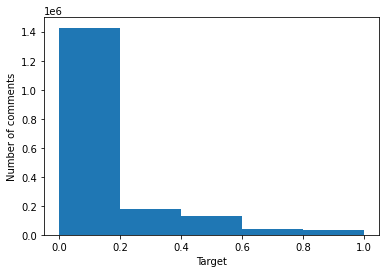

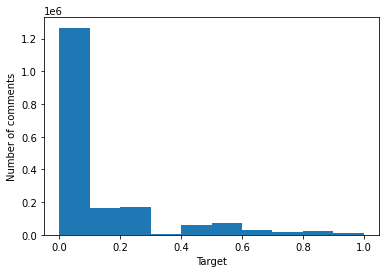

In [15]:
plt.hist(df_train['target'], bins = 5);
plt.ylabel('Number of comments')
plt.xlabel('Target')
plt.show()

plt.hist(df_train['target'], bins = 10);
plt.ylabel('Number of comments')
plt.xlabel('Target')
plt.show()


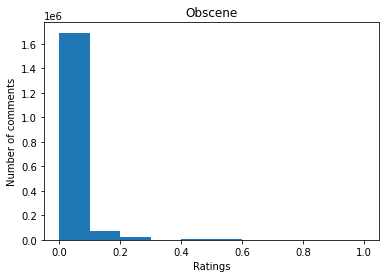

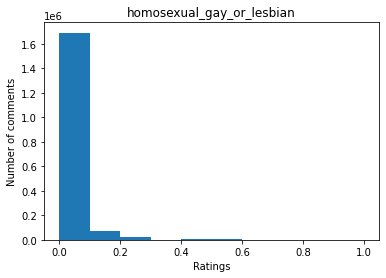

In [16]:
plt.hist(df_train['obscene'], bins = 10);
plt.ylabel('Number of comments')
plt.xlabel('Ratings')
plt.title('Obscene')
plt.show()


plt.hist(df_train['obscene'], bins = 10);
plt.ylabel('Number of comments')
plt.xlabel('Ratings')
plt.title('homosexual_gay_or_lesbian')
plt.show()



### Create Balanced Dataset

In [17]:
# df_train.shape
# (1804874, 45)

print ((df_train['target'] >= 0.5).sum())
print ((df_train['target'] < 0.5).sum())
print (df_train.shape[0])


df_train_toxic = df_train[df_train['target'] >= 0.5]
df_train_nontoxic = df_train[df_train['target'] < 0.5]

print ('\nBefore balancing:')
print ('Toxic shape ' + str(df_train_toxic.shape))
print ('Non-Toxic shape ' + str(df_train_nontoxic.shape))

df_train_nontoxic = df_train_nontoxic.sample(n = df_train_toxic.shape[0])

print ('\nAfter balancing:')
print ('Toxic shape ' + str(df_train_toxic.shape))
print ('Non-Toxic shape ' + str(df_train_nontoxic.shape))

df_balanced = pd.concat([df_train_toxic, df_train_nontoxic])

print ('\nBalanced shape ' + str(df_balanced.shape))


#df_train[df_train['target'] > .5].count()

#df_train.count()
#(df_train['target'] > .5).count()

144334
1660540
1804874

Before balancing:
Toxic shape (144334, 45)
Non-Toxic shape (1660540, 45)

After balancing:
Toxic shape (144334, 45)
Non-Toxic shape (144334, 45)

Balanced shape (288668, 45)


### Create Toxic column, that we will try to predict

In [33]:
df_balanced['toxic'] = np.where(df_balanced.target >= 0.5, 1, 0)

df_balanced.head(3)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,toxic
0,5140750,0.200000,Jeez...did you take too many blows to your head? Didn't know there are too many other ...,0.0,0.0,0.00,0.200000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-16 23:53:24.393164+00,55,5140255.0,327349,approved,0,0,0,0,0,0.0,0,5,0
1,5881384,0.216667,Yea.... a Harpo with better hair who gives my tax dollars to terrorists \n\nhttp://ra...,0.0,0.0,0.05,0.166667,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-01 20:02:28.839523+00,54,5880894.0,372862,rejected,0,0,0,0,0,0.0,0,60,0
2,6027428,0.000000,London (the real one in UK) just kicked them out. As well as several places all around...,0.0,0.0,0.00,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-26 16:57:32.071282+00,54,6025845.0,382076,approved,1,0,0,3,1,0.0,0,4,0


##  Data cleaning & randomization

In [32]:
#  Data cleaning
#  Remove HTML
df_balanced['comment_text'] = df_balanced['comment_text'].str.replace(r'<[^<>]*>', '', regex=True)

df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)


### Get rid of columns we don't need

In [34]:
df_balanced = df_balanced[['comment_text', 'toxic']]



### Split into Train, Validation and Test

In [36]:
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(df_input, stratify_colname='y',
                                         frac_train=0.6, frac_val=0.15, frac_test=0.25,
                                         random_state=None):
    '''
    Splits a Pandas dataframe into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in a specific column (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.

    Parameters
    ----------
    df_input : Pandas dataframe
        Input dataframe to be split.
    stratify_colname : str
        The name of the column that will be used for stratification. Usually
        this column would be for the label.
    frac_train : float
    frac_val   : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().

    Returns
    -------
    df_train, df_val, df_test :
        Dataframes containing the three splits.
    '''

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError('fractions %f, %f, %f do not add up to 1.0' % \
                         (frac_train, frac_val, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError('%s is not a column in the dataframe' % (stratify_colname))

    X = df_input # Contains all columns.
    y = df_input[[stratify_colname]] # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(X,
                                                          y,
                                                          stratify=y,
                                                          test_size=(1.0 - frac_train),
                                                          random_state=random_state)

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(df_temp,
                                                      y_temp,
                                                      stratify=y_temp,
                                                      test_size=relative_frac_test,
                                                      random_state=random_state)

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test


df_train, df_val, df_test = \
    split_stratified_into_train_val_test(df_balanced, stratify_colname='toxic', frac_train=0.60, frac_val=0.20, frac_test=0.20)

In [37]:
df_train.to_csv('train_data.csv')
df_val.to_csv('validation_data.csv')
df_test.to_csv('test_data.csv')

In [38]:
!ls

jigsaw-unintended-bias-in-toxicity-classification.zip  train_data.csv
sample_data					       validation_data.csv
test_data.csv


In [39]:


files.download('train_data.csv')
files.download('validation_data.csv')
files.download('test_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>